In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft #stft
from scipy.signal import butter, sosfiltfilt #signal filtering 
from scipy.interpolate import interp1d
import numpy as npy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [17]:
#first test example from "MuseCrocMobile" Paper
#file_path = "MuseCrocMobile_Analysis/2025-08-16_15_12_26_Muse_Recording.csv"

#while programming - moving around at desk 
#file_path = "MuseCrocMobile_2025-10-08_21_57_05_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#eyes open, staring at monitor 
file_path = "MuseCrocMobile_2025-10-08_21_12_24_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#change to your file path
df = pd.read_csv(file_path)
df.head()

for col_name in df.columns:
    print(col_name)

print(df.shape)

#prints packet types
print(df['PACKET_TYPE'].unique())

#Setting font size to 25 for all graphs
plt.rcParams.update({'font.size': 25})

PACKET_TYPE
CLOCK_TIME
ms_ELAPSED
TP9_CONNECTION_STRENGTH(HSI)
TP9_ARTIFACT_FREE(IS_GOOD)
AF7_CONNECTION_STRENGTH(HSI)
AF7_ARTIFACT_FREE(IS_GOOD)
AF8_CONNECTION_STRENGTH(HSI)
AF8_ARTIFACT_FREE(IS_GOOD)
TP10_CONNECTION_STRENGTH(HSI)
TP10_ARTIFACT_FREE(IS_GOOD)
TP9_RAW
AF7_RAW
AF8_RAW
TP10_RAW
DRL
REF
TP9_DELTA_ABSOLUTE
AF7_DELTA_ABSOLUTE
AF8_DELTA_ABSOLUTE
TP10_DELTA_ABSOLUTE
TP9_THETA_ABSOLUTE
AF7_THETA_ABSOLUTE
AF8_THETA_ABSOLUTE
TP10_THETA_ABSOLUTE
TP9_ALPHA_ABSOLUTE
AF7_ALPHA_ABSOLUTE
AF8_ALPHA_ABSOLUTE
TP10_ALPHA_ABSOLUTE
TP9_BETA_ABSOLUTE
AF7_BETA_ABSOLUTE
AF8_BETA_ABSOLUTE
TP10_BETA_ABSOLUTE
TP9_GAMMA_ABSOLUTE
AF7_GAMMA_ABSOLUTE
AF8_GAMMA_ABSOLUTE
TP10_GAMMA_ABSOLUTE
TP9_DELTA_RELATIVE
AF7_DELTA_RELATIVE
AF8_DELTA_RELATIVE
TP10_DELTA_RELATIVE
TP9_THETA_RELATIVE
AF7_THETA_RELATIVE
AF8_THETA_RELATIVE
TP10_THETA_RELATIVE
TP9_ALPHA_RELATIVE
AF7_ALPHA_RELATIVE
AF8_ALPHA_RELATIVE
TP10_ALPHA_RELATIVE
TP9_BETA_RELATIVE
AF7_BETA_RELATIVE
AF8_BETA_RELATIVE
TP10_BETA_RELATIVE
TP9_GAMMA_RELA

Original dataframe shape: (66615, 80)
EEG-only dataframe shape: (7453, 17)


/tmp/ipykernel_10152/1301976036.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


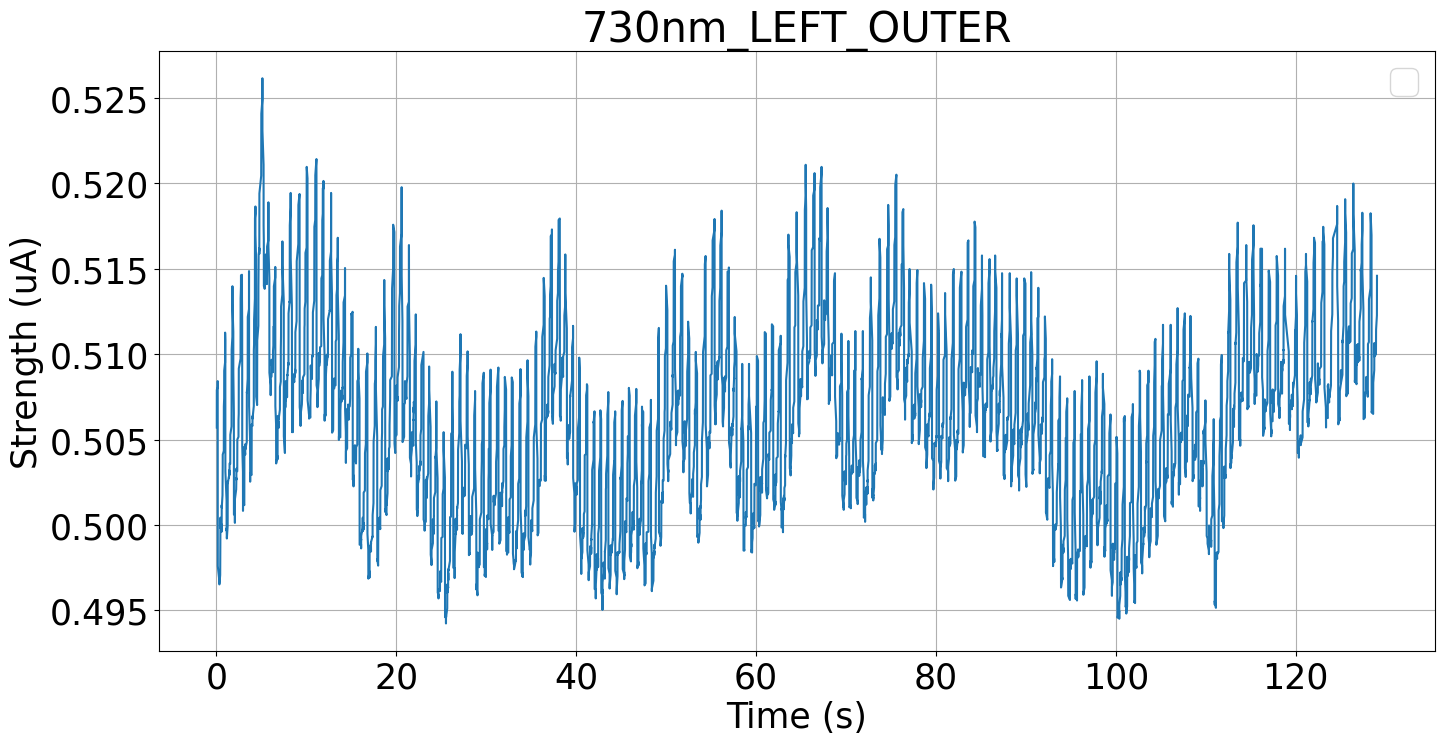

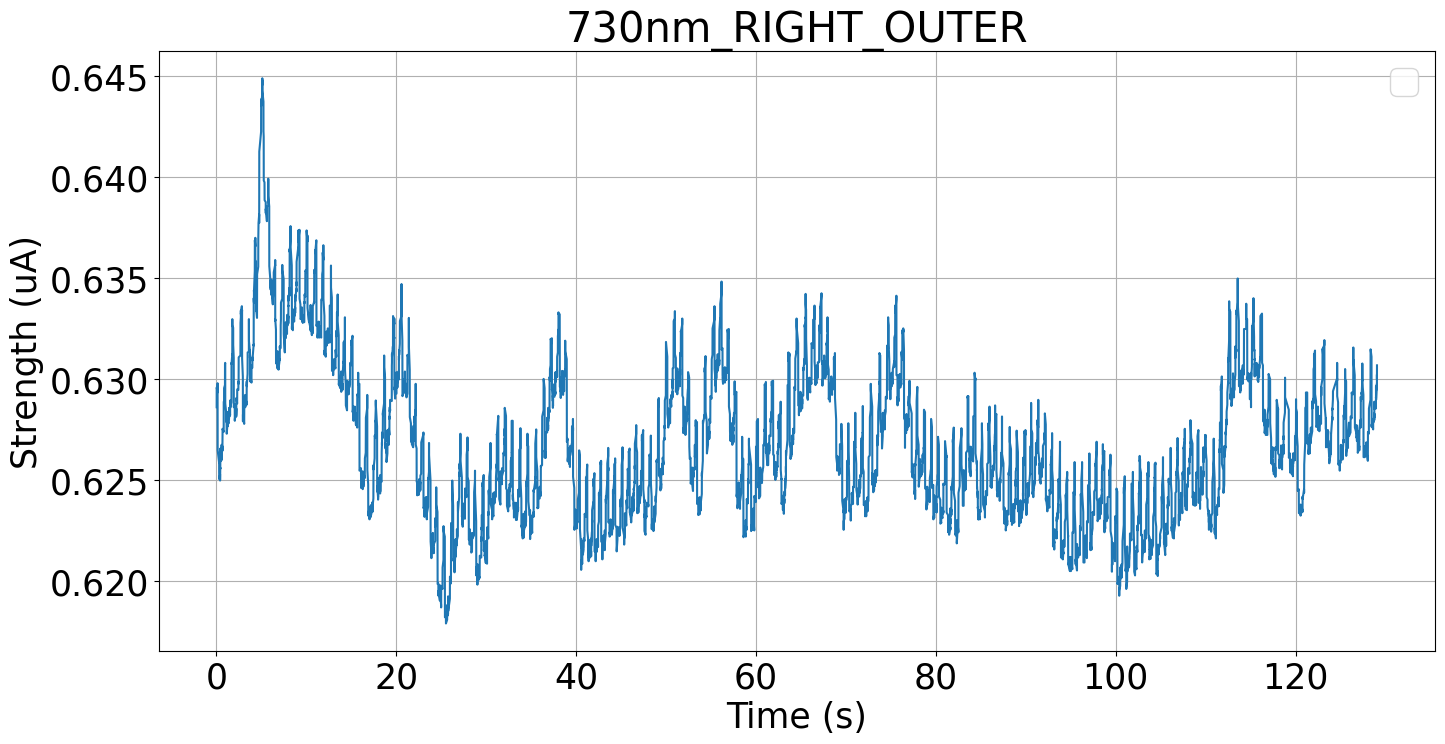

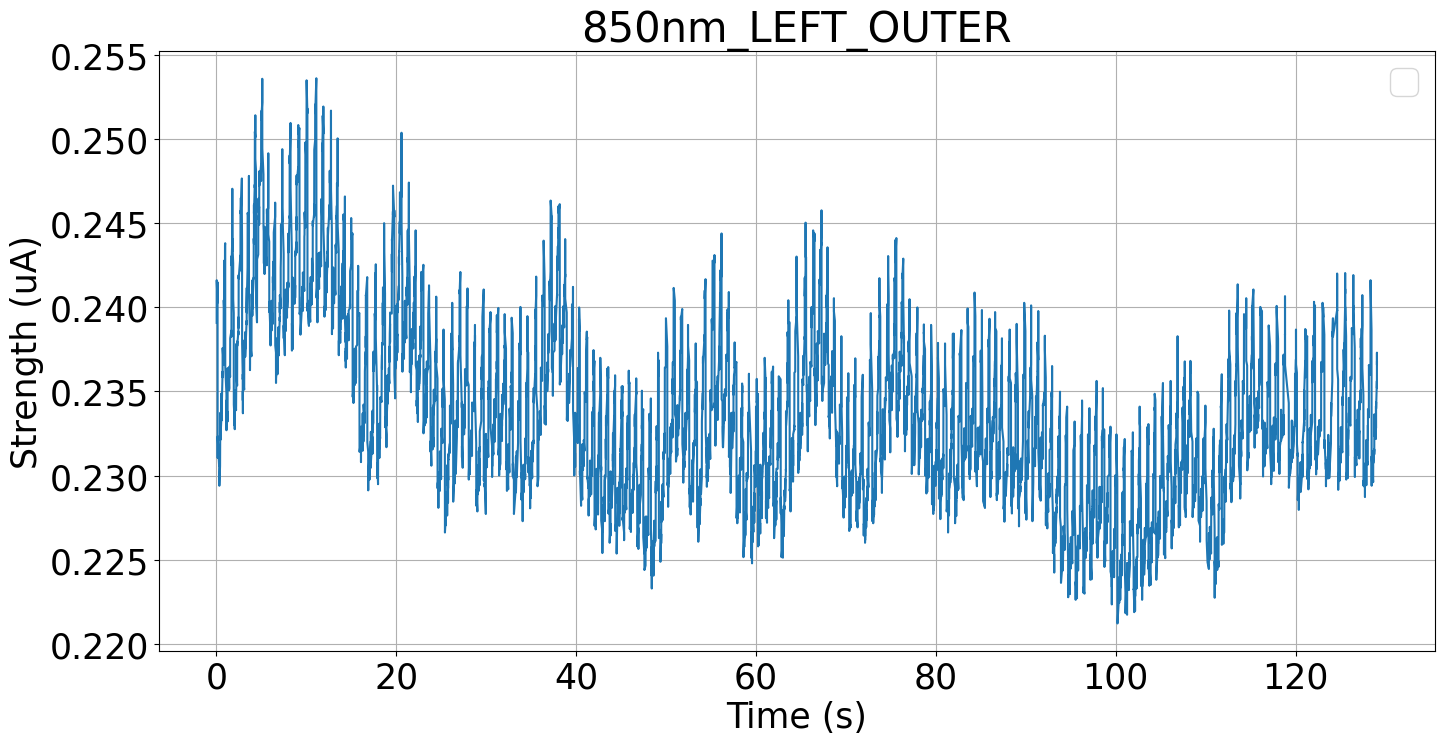

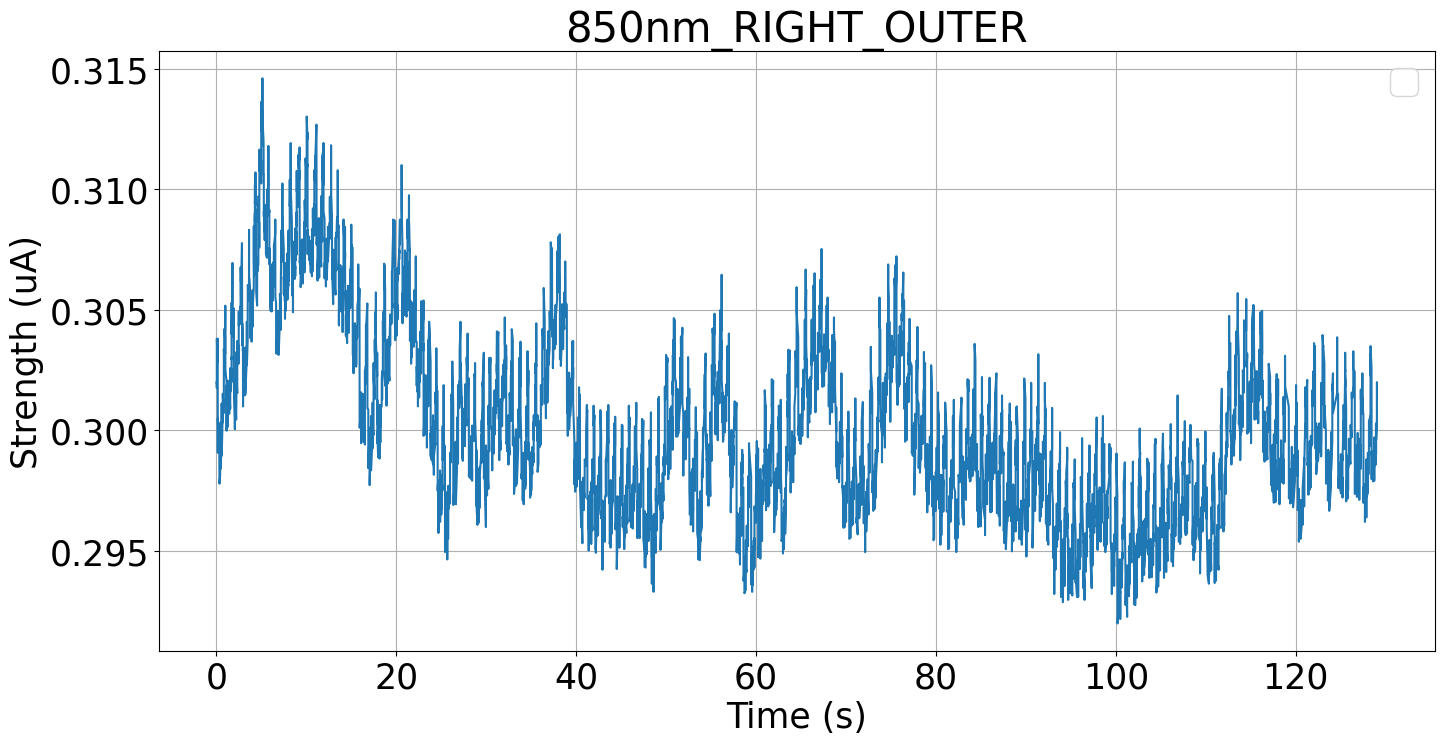

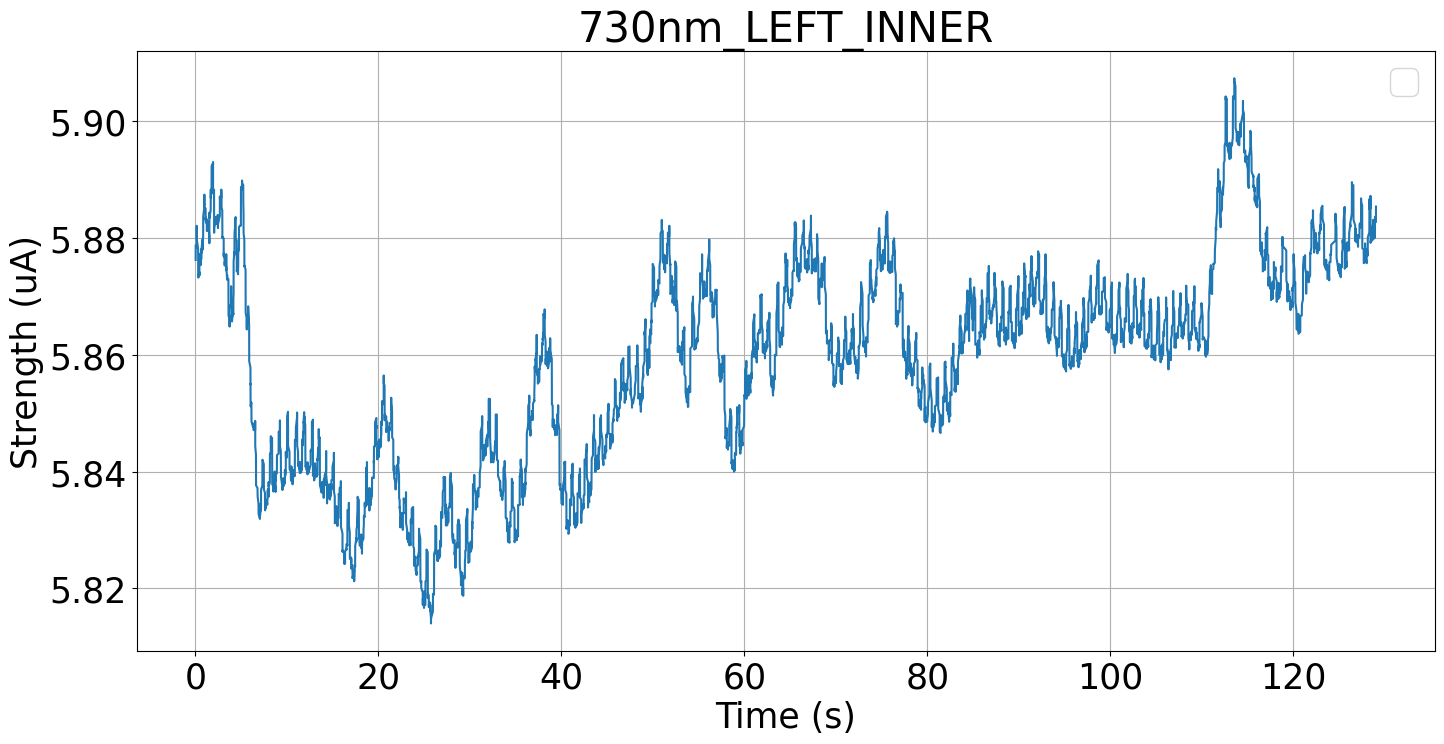

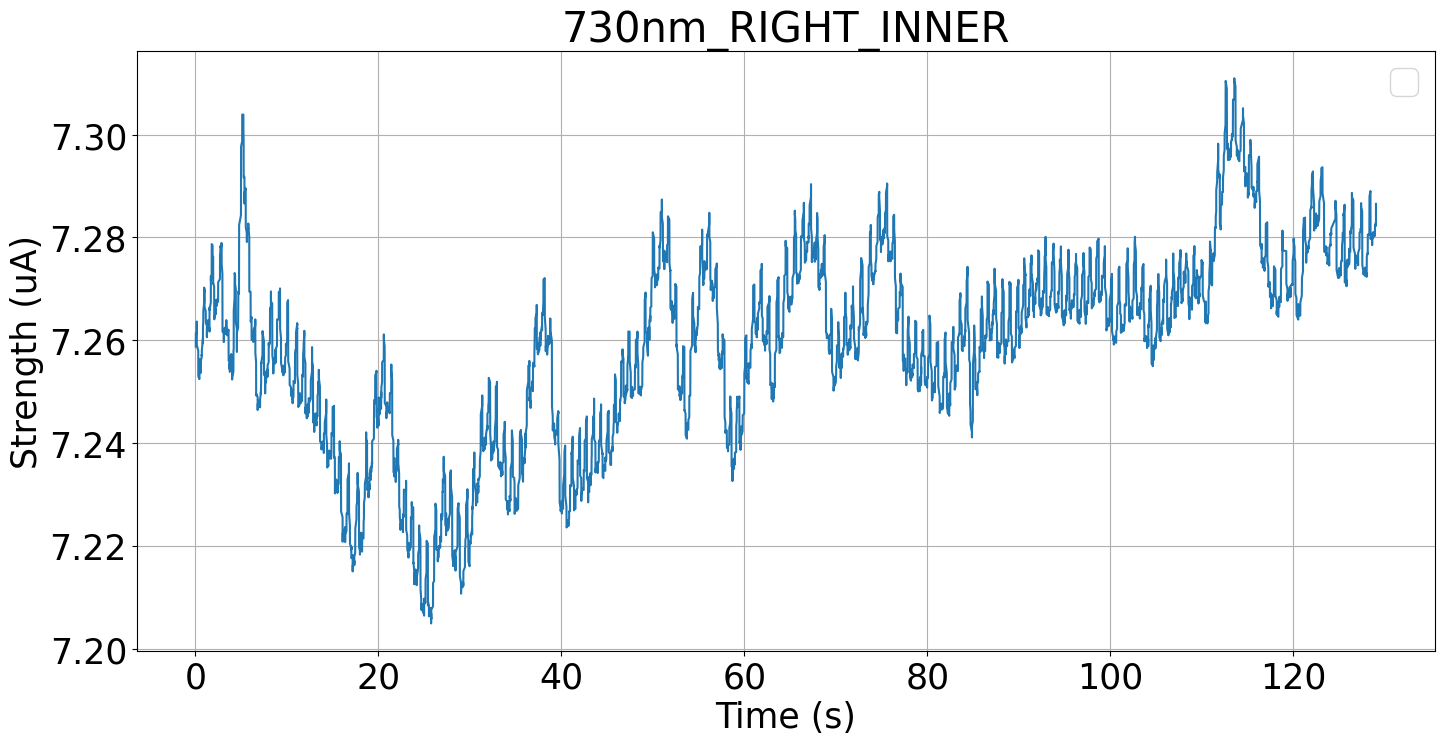

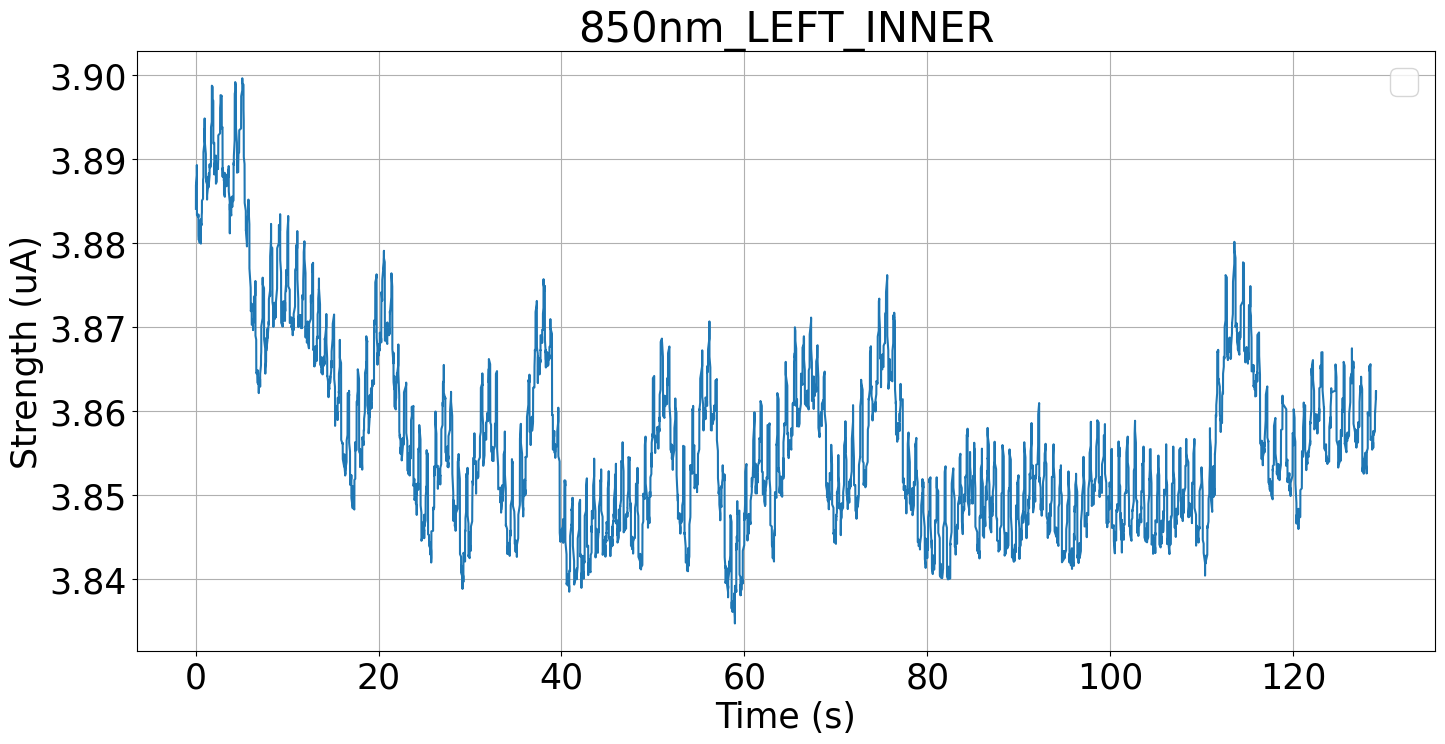

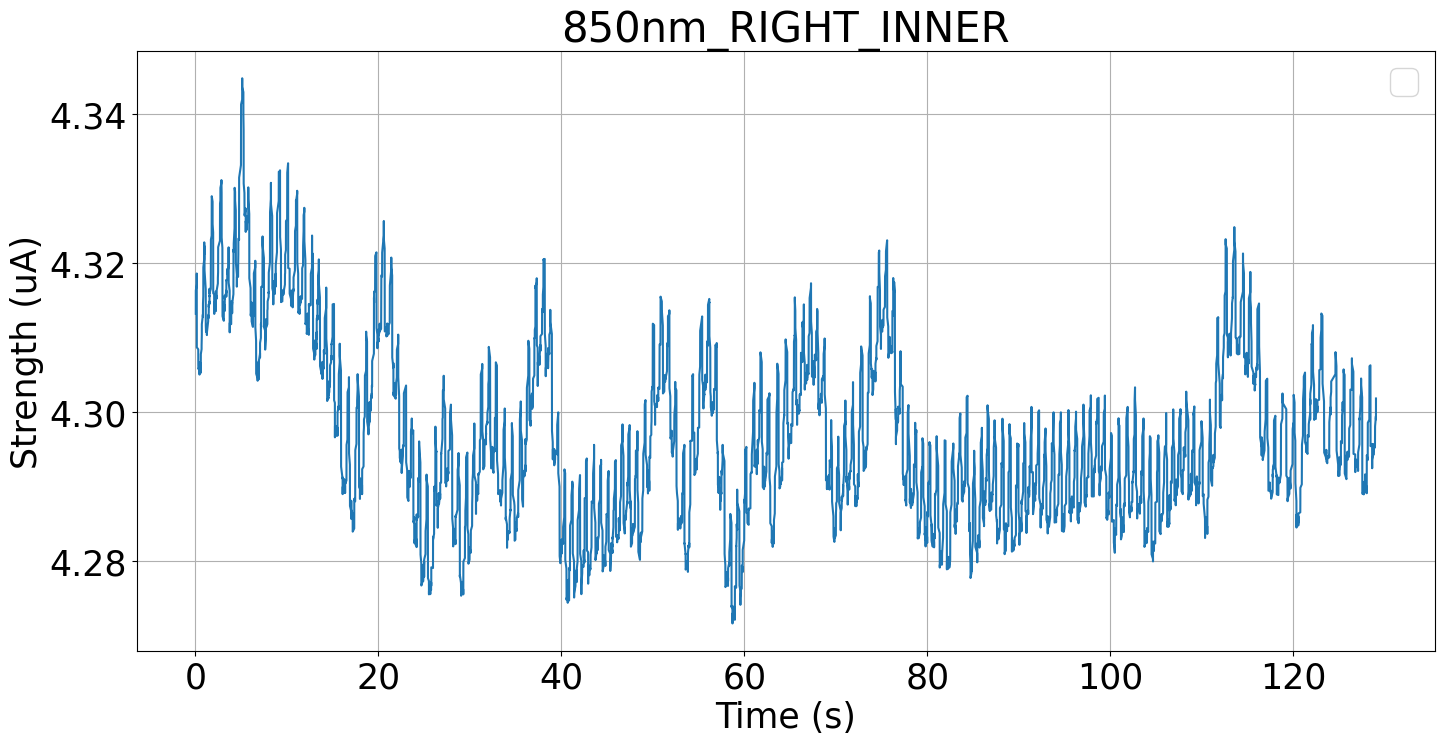

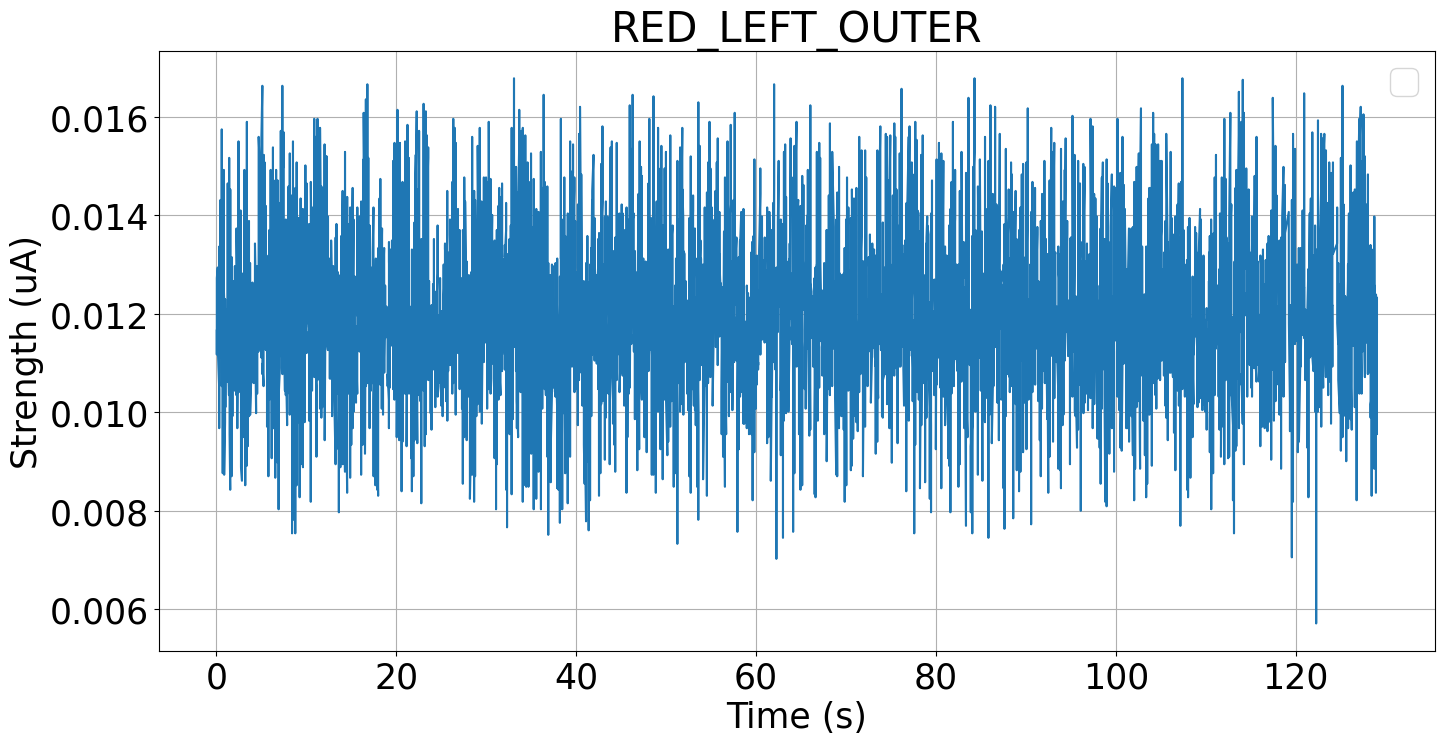

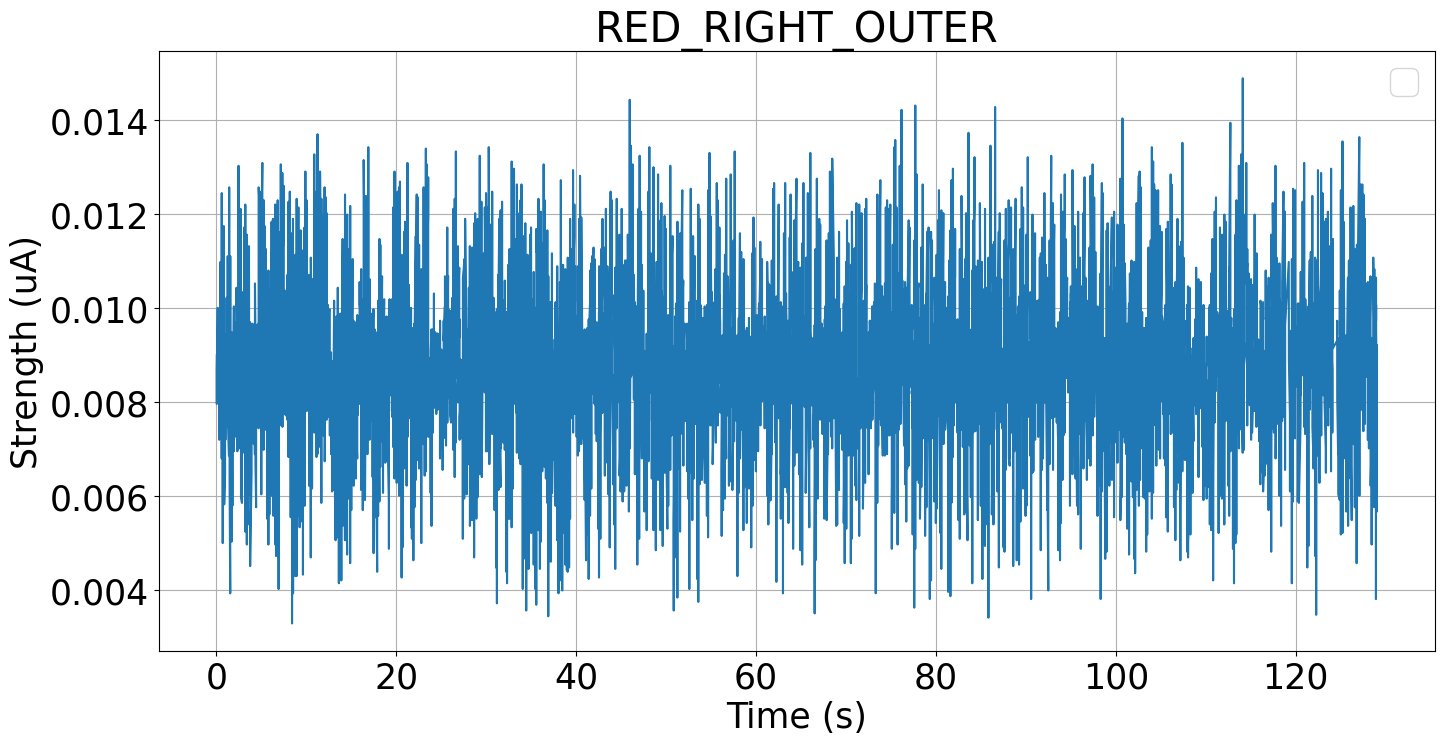

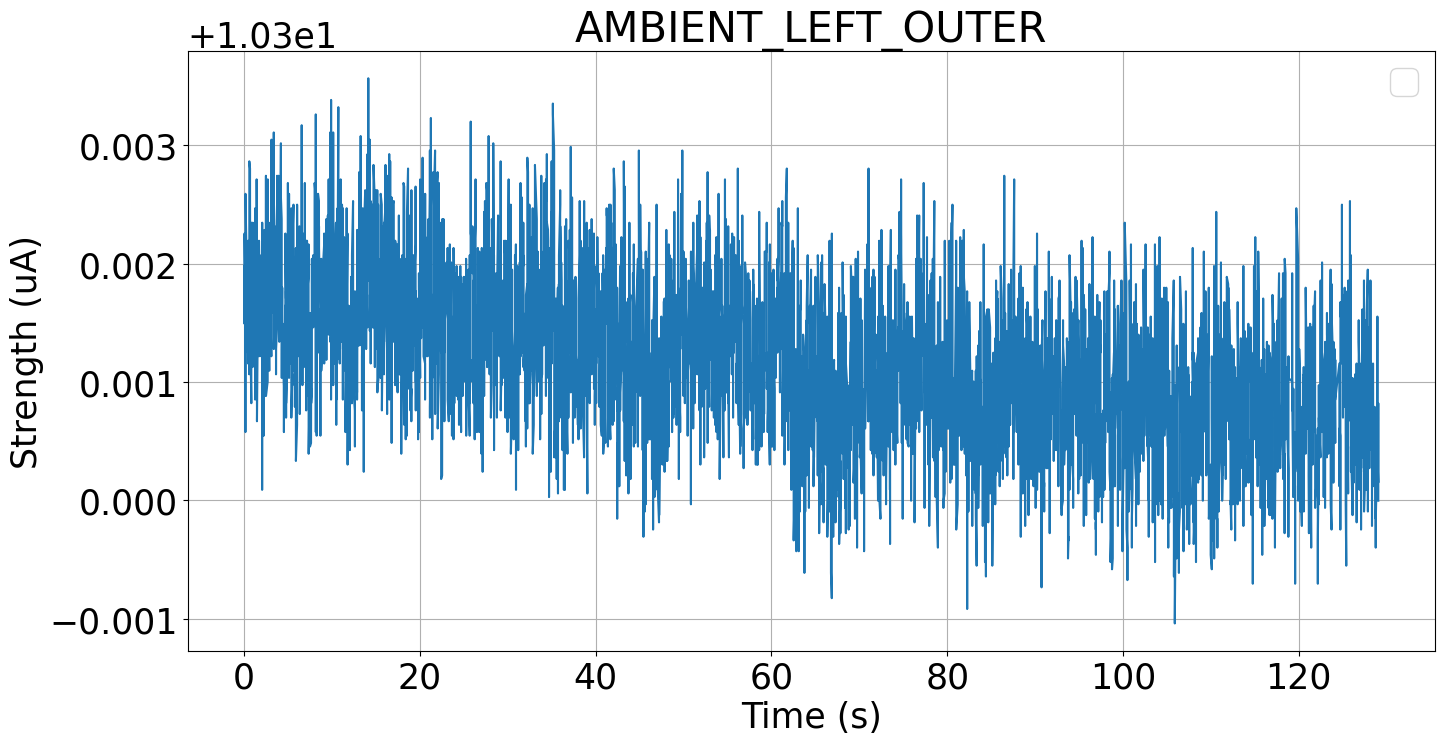

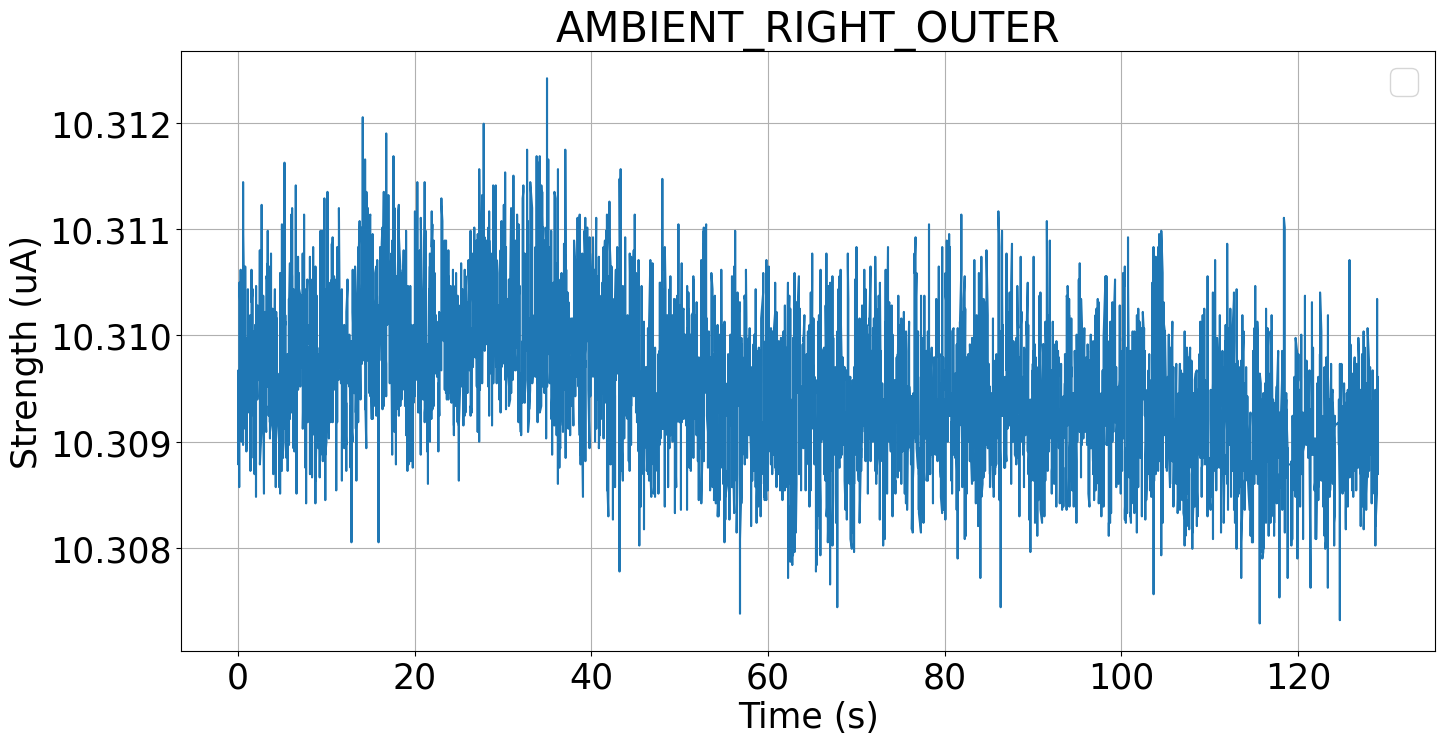

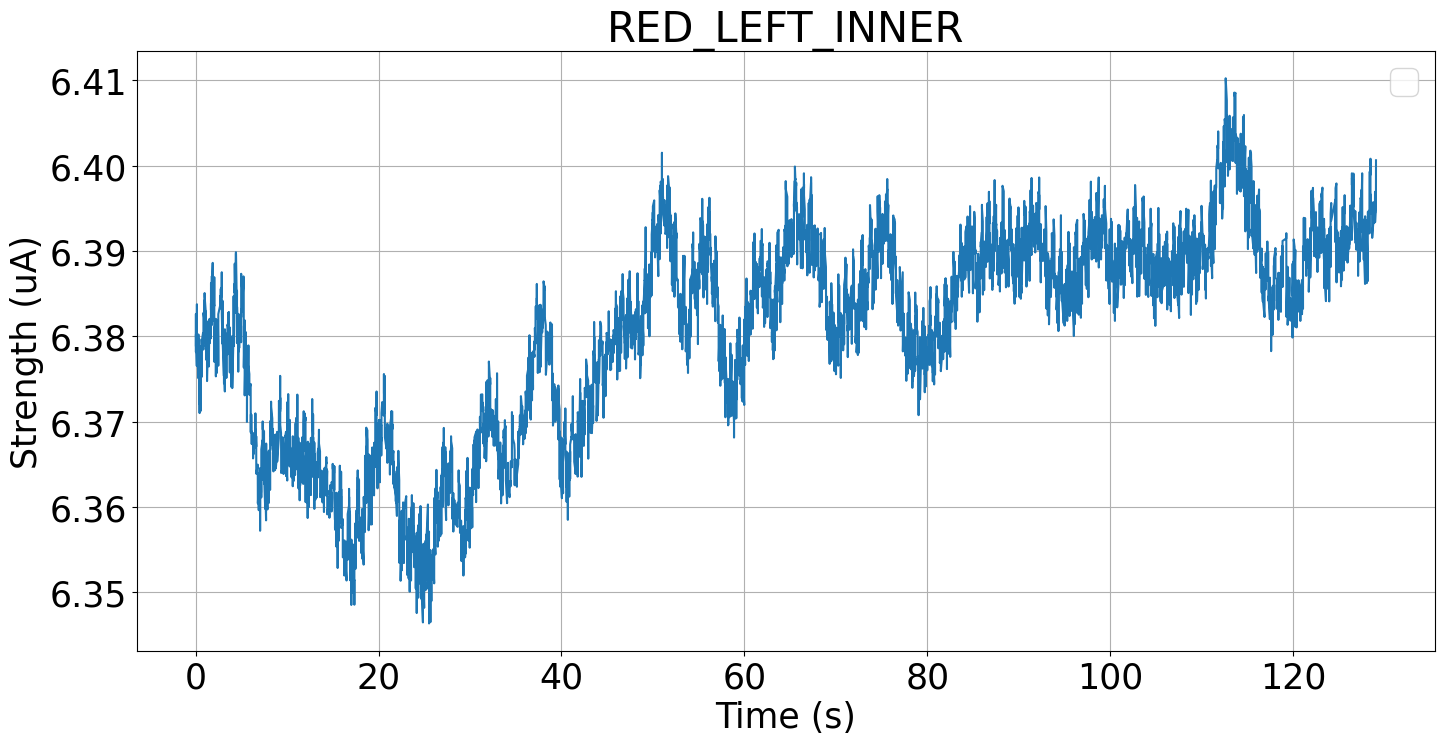

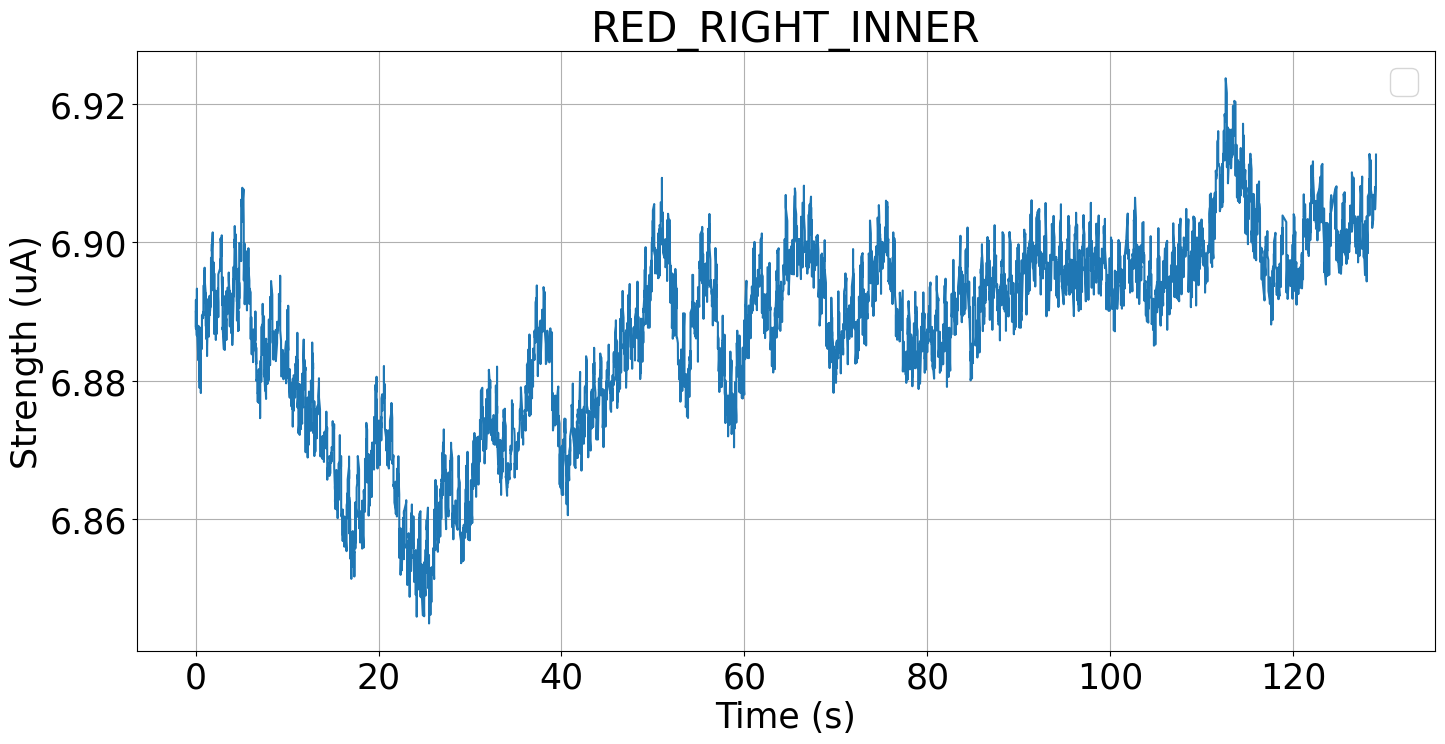

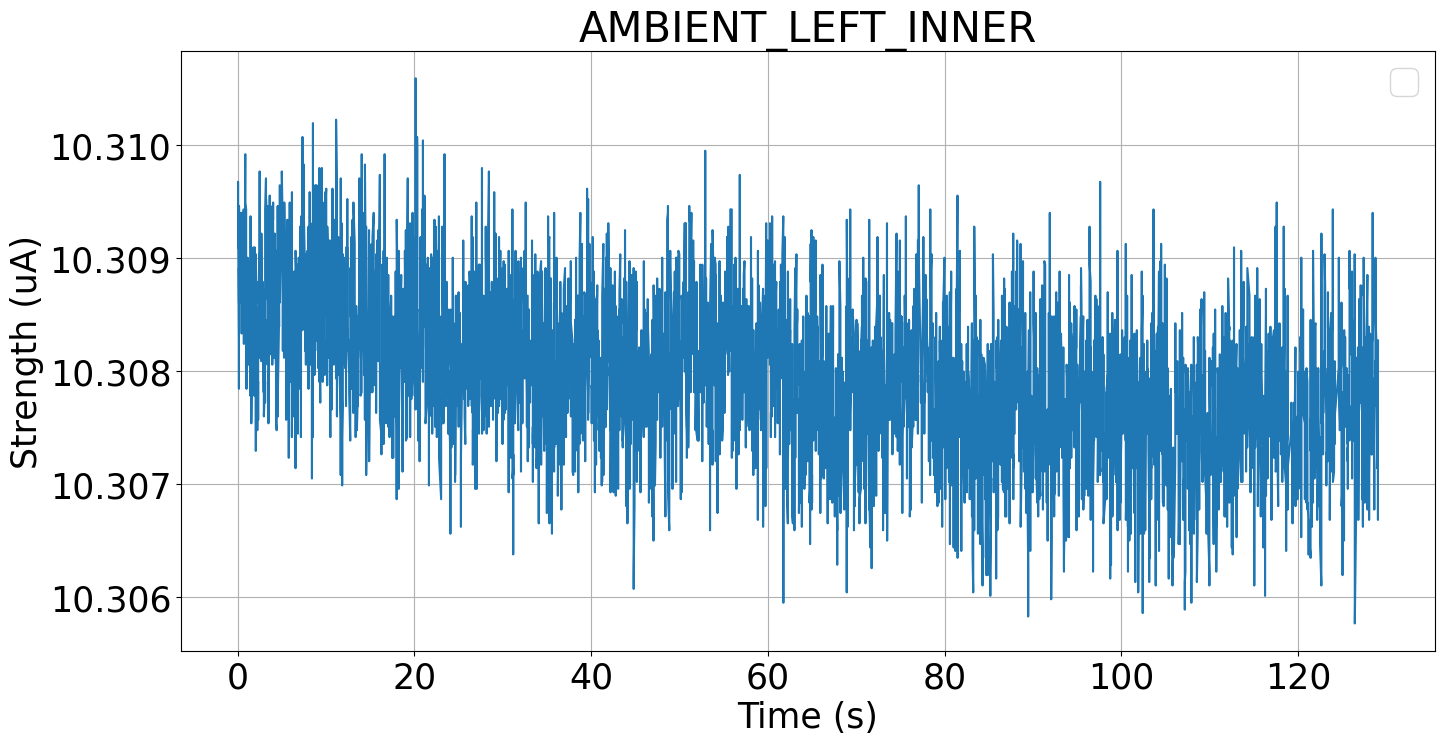

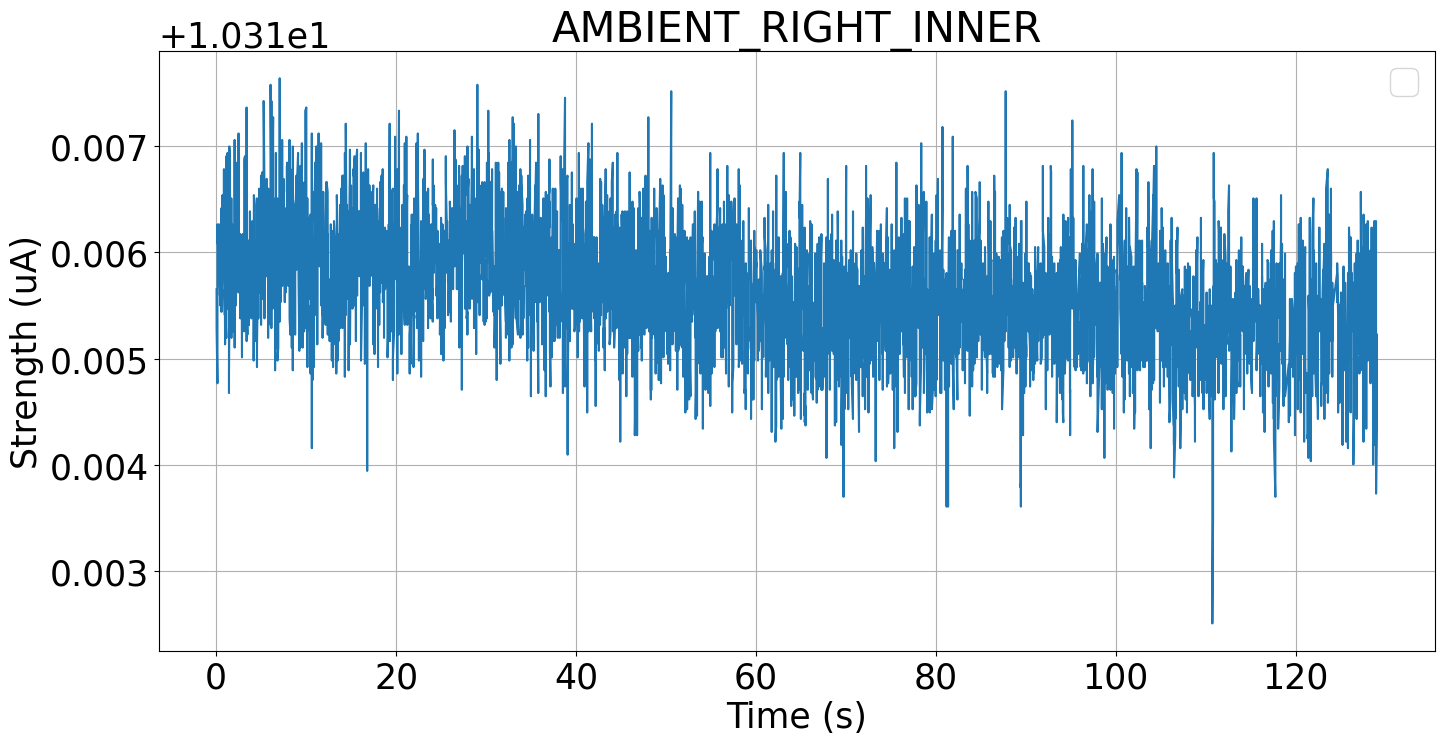

In [18]:
'''
Now, for accurate processing of raw OPTICS, 
we need to select values only from lines 
where packet type is OPTICS. This is to 
remove duplicate values and prevent / spot 
possible issues. 
'''


# Filter for raw OTPICS packet types only
optics_df = df[df['PACKET_TYPE'] == 'OPTICS'][['ms_ELAPSED',
'730nm_LEFT_OUTER',
'730nm_RIGHT_OUTER',
'850nm_LEFT_OUTER',
'850nm_RIGHT_OUTER',
'730nm_LEFT_INNER',
'730nm_RIGHT_INNER',
'850nm_LEFT_INNER',
'850nm_RIGHT_INNER',
'RED_LEFT_OUTER',
'RED_RIGHT_OUTER',
'AMBIENT_LEFT_OUTER',
'AMBIENT_RIGHT_OUTER',
'RED_LEFT_INNER',
'RED_RIGHT_INNER',
'AMBIENT_LEFT_INNER',
'AMBIENT_RIGHT_INNER']].copy()


#get time in seconds of eeg df
optics_df_time_sec = optics_df["ms_ELAPSED"] / 1000.0

# Reset index for clean indexing
optics_df = optics_df.reset_index(drop=True)

print(f"Original dataframe shape: {df.shape}")
print(f"EEG-only dataframe shape: {optics_df.shape}")
optics_df.head()


''' 
Graphing raw Athena fNIRS 
'''

channels = ['730nm_LEFT_OUTER',
'730nm_RIGHT_OUTER',
'850nm_LEFT_OUTER',
'850nm_RIGHT_OUTER',
'730nm_LEFT_INNER',
'730nm_RIGHT_INNER',
'850nm_LEFT_INNER',
'850nm_RIGHT_INNER',
'RED_LEFT_OUTER',
'RED_RIGHT_OUTER',
'AMBIENT_LEFT_OUTER',
'AMBIENT_RIGHT_OUTER',
'RED_LEFT_INNER',
'RED_RIGHT_INNER',
'AMBIENT_LEFT_INNER',
'AMBIENT_RIGHT_INNER']

for ch in channels:

    plt.figure(figsize=(15, 8))
    plt.plot(optics_df_time_sec, optics_df[ch])
    plt.title(ch)
    plt.xlabel("Time (s)")
    plt.ylabel("Strength (uA)")
    #plt.xlim(0,30)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()